In [1]:
import matplotlib.pyplot as plt
import struct
import numpy as np
import os

In [2]:
with open("debug_pixels/a_samples.bin", "rb") as fin:
  samples_cnt = struct.unpack("i", fin.read(4))[0]
  samples = np.array(struct.unpack("f" * samples_cnt * 2, fin.read(4 * samples_cnt * 2))).reshape(samples_cnt, 2)
  print("samples.size() = ", len(samples))

class PixelData:
  def __init__(self, filename):
    if not os.path.exists(filename):
      self.line = None
      self.labels = np.array([0] * samples_cnt)
      return 
    with open(filename, "rb") as fin: 
      linesNum = struct.unpack("i", fin.read(4))[0]
      # print("linesNum = ", linesNum)
      self.line = struct.unpack("f" * 3, fin.read(4 * 3))
      self.labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt))) 


samples.size() =  65


In [17]:
#center_x,center_y = 418,153
center_x,center_y = 418,146
half_window = 2

coords = [
    [(x,y) for x in range(center_x - half_window, center_x + half_window + 1)] 
           for y in range(center_y - half_window, center_y + half_window + 1)
]

pixelsToOpen = [
    ["debug_pixels/pix_{}_{}.bin".format("0" * (4 - len(str(x))) + str(x), "0" * (4 - len(str(y))) + str(y)) for x in range(center_x - half_window, center_x + half_window + 1)]
    for y in range(center_y - half_window, center_y + half_window + 1)
]

pixels = [[PixelData(p) for p in pixelLine] for pixelLine in pixelsToOpen]

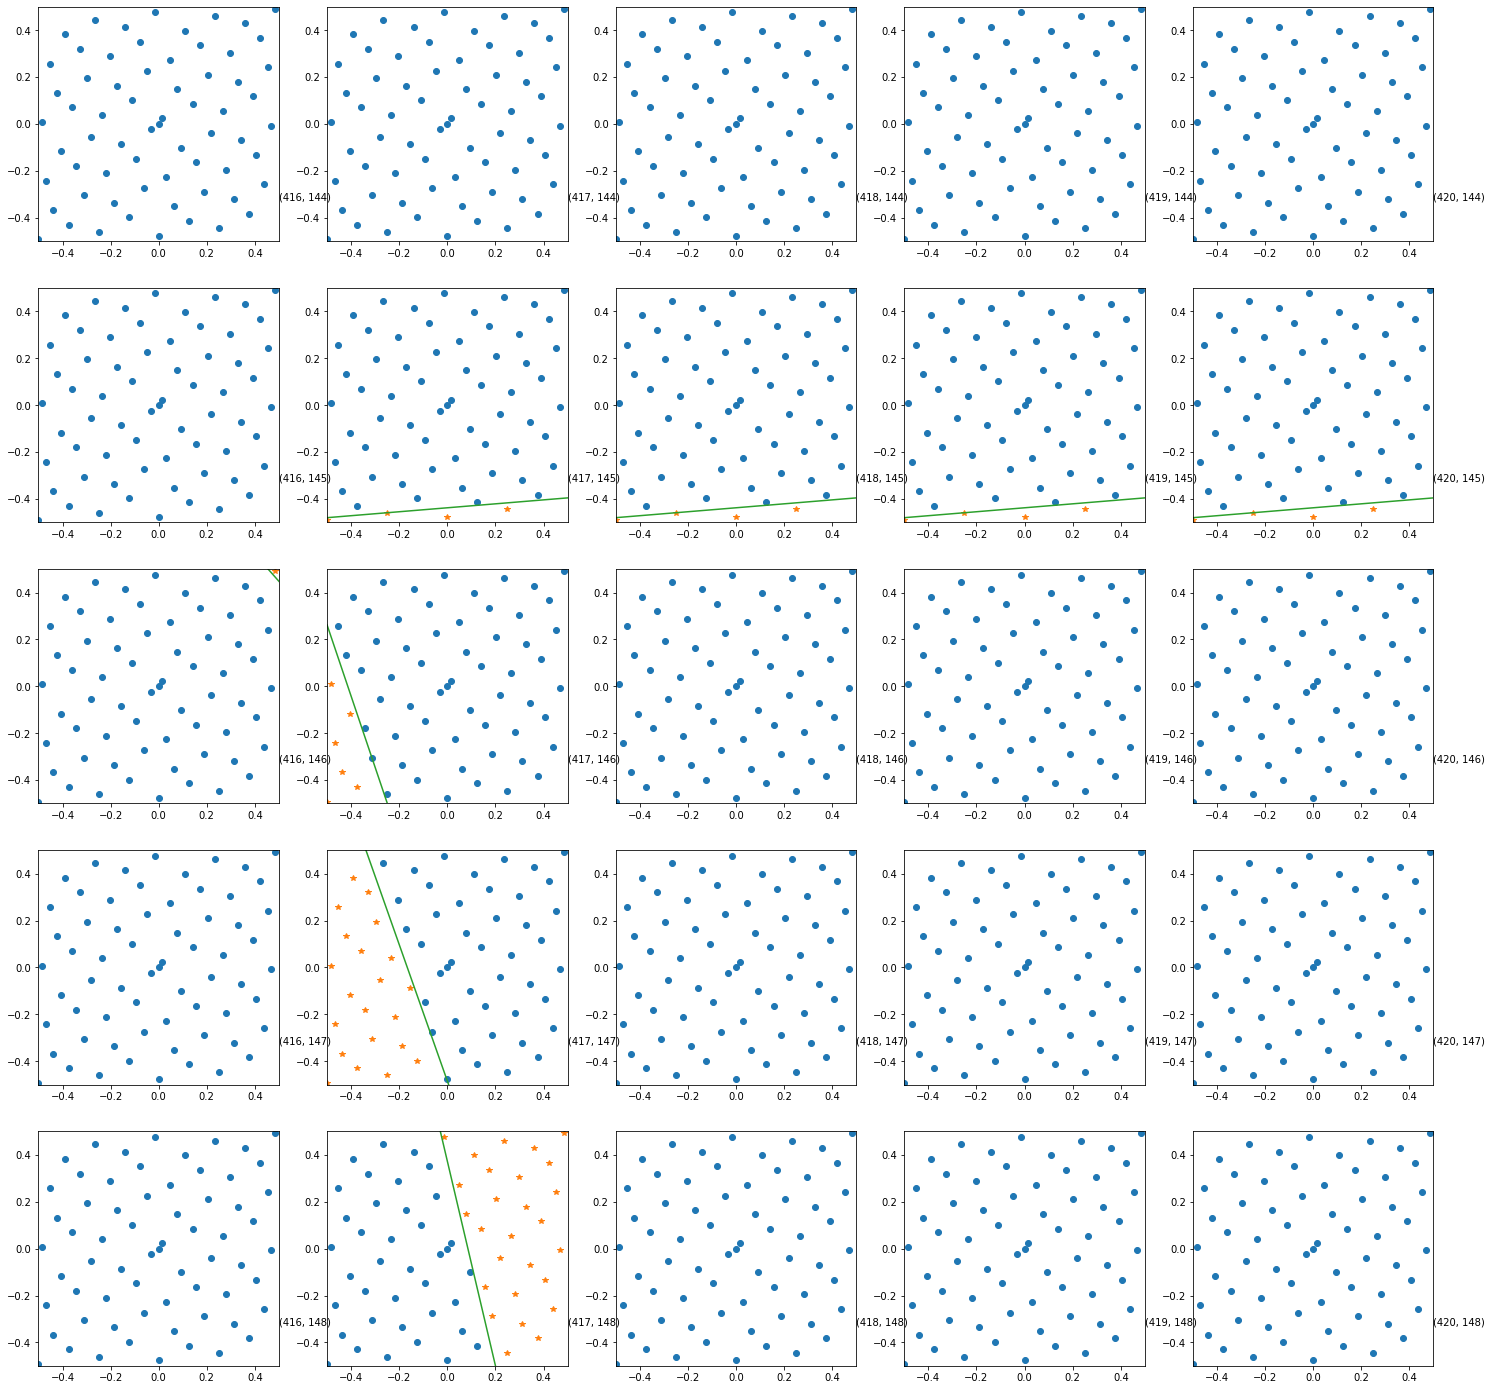

In [18]:
fig = plt.figure(figsize=(5 * len(pixels[0]), 5 * len(pixels)))

idx = 0
for (pix_line,line) in zip(reversed(pixels), reversed(coords)):
    for (pixel,coords) in zip(reversed(pix_line), reversed(line)):
        ax = fig.add_subplot(len(pixels), len(pix_line), len(pixels) * len(pix_line) - idx)
        radius = 0.5
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
        ax.annotate(str(coords), xy=(0.5, -0.325))
        ax.plot(samples[pixel.labels == 0][:, 0], samples[pixel.labels == 0][:, 1], 'o')
        ax.plot(samples[pixel.labels == 1][:, 0], samples[pixel.labels == 1][:, 1], '*')

        # Uncomment to annotate samples
        # for i in range(len(samples)):
        #     plt.annotate(str(i), samples[i], textcoords="offset points", xytext=(0,8),ha='center')
        if pixel.line:
            x = np.linspace(-radius, radius)
            plt.plot(x, -(pixel.line[0] / pixel.line[1] * x + pixel.line[2] / pixel.line[1]))
        idx += 1